In [14]:
import pandas as pd
import pickle
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

In [52]:
with open('C:/Users/dogun/Desktop/dictabs.pickle','wb') as f:
    pickle.dump(data, f)

In [48]:
with open('C:/Users/dogun/Desktop/dictabs.pickle','rb') as f:
    data = pickle.load(f)

In [49]:
data # 키워드 : 의사 넘버,   과별 논문 영향치(논문 전체 합산), 눈문개수 로 구성

{'2': [array([0.5553632 , 0.02204565, 0.04817488, 0.00869414, 0.06097057,
         0.11160151, 0.19315007]), 1],
 '3': [array([7.65488612, 0.1799335 , 0.03649125, 0.10032764, 0.50753293,
         0.0920874 , 1.42874149]), 10],
 '4': [array([0.00952359, 0.01394262, 1.68479043, 0.00702694, 0.01928016,
         0.19569195, 0.06974444]), 2],
 '5': [array([0.10682068, 0.21973209, 0.12378424, 0.1975888 , 1.6770859 ,
         2.50696456, 0.16802363]), 5],
 '7': [array([0.02810876, 0.09685976, 0.58014823, 1.10752878, 0.95121587,
         1.14592437, 0.09021423]), 4],
 '8': [array([0.02777432, 0.02863081, 0.03944741, 0.02053517, 2.6503516 ,
         1.87080344, 0.36245739]), 5],
 '9': [array([0.01099858, 0.02136085, 0.00462791, 0.03083001, 2.47507694,
         0.35302154, 0.10408421]), 3],
 '11': [array([0.06134545, 0.93289546, 0.49761979, 0.38685721, 1.00311359,
         0.04051954, 0.07764893]), 3],
 '12': [array([0.02605405, 0.25993351, 0.01941417, 1.77504745, 0.6485789 ,
         0.16997597

In [5]:
co = sqlite3.connect("C:/Users/dogun/Desktop/patientmatching_190823.db")
cu = co.cursor()
cu.execute("SELECT id,age FROM doctor")

In [6]:
base = cu.fetchall()

In [7]:
age = {}
for i in base:
    age[str(i[0])] = i[1]+1 # 0을 log 를 취하면 -inf 값이 되므로 기본적으로 1값을 가지게 추가
    

In [8]:
age #의사 넘버와 개업년수로 할당

{'1': 5,
 '2': 4,
 '3': 5,
 '4': 10,
 '5': 6,
 '6': 7,
 '7': 6,
 '8': 5,
 '9': 16,
 '10': 14,
 '11': 9,
 '12': 3,
 '13': 6,
 '14': 21,
 '15': 4,
 '16': 5,
 '17': 30,
 '18': 5,
 '20': 4,
 '21': 5,
 '22': 4,
 '24': 6,
 '25': 11,
 '26': 6,
 '28': 4,
 '29': 6,
 '31': 21,
 '32': 11,
 '33': 11,
 '34': 7,
 '36': 7,
 '37': 4,
 '39': 6,
 '40': 6,
 '41': 5,
 '42': 4,
 '43': 7,
 '44': 4,
 '45': 5,
 '47': 5,
 '48': 5,
 '50': 11,
 '51': 16,
 '52': 10,
 '53': 12,
 '54': 23,
 '56': 14,
 '57': 3,
 '58': 10,
 '59': 6,
 '60': 4,
 '61': 6,
 '62': 4,
 '63': 18,
 '66': 6,
 '67': 8,
 '68': 3,
 '69': 7,
 '70': 12,
 '71': 6,
 '72': 25,
 '73': 18,
 '74': 7,
 '75': 6,
 '76': 12,
 '77': 15,
 '78': 8,
 '79': 10,
 '81': 6,
 '82': 6,
 '83': 5,
 '84': 13,
 '85': 6,
 '86': 12,
 '87': 5,
 '88': 24,
 '89': 15,
 '90': 5,
 '91': 3,
 '92': 5,
 '93': 3,
 '94': 14,
 '95': 15,
 '96': 4,
 '97': 14,
 '98': 21,
 '99': 9,
 '100': 11,
 '101': 11,
 '102': 20,
 '103': 4,
 '104': 2,
 '105': 3,
 '107': 13,
 '108': 18,
 '109': 4,
 '11

In [9]:
for i,k in age.items():
    age[i] = np.log(k)/np.log(5) #아래자리 5 가 없어서 계산식으로 표현

In [10]:
age

{'1': 1.0,
 '2': 0.8613531161467861,
 '3': 1.0,
 '4': 1.4306765580733933,
 '5': 1.1132827525593785,
 '6': 1.2090619551221675,
 '7': 1.1132827525593785,
 '8': 1.0,
 '9': 1.7227062322935722,
 '10': 1.6397385131955606,
 '11': 1.3652123889719707,
 '12': 0.6826061944859854,
 '13': 1.1132827525593785,
 '14': 1.8916681496081529,
 '15': 0.8613531161467861,
 '16': 1.0,
 '17': 2.1132827525593787,
 '18': 1.0,
 '20': 0.8613531161467861,
 '21': 1.0,
 '22': 0.8613531161467861,
 '24': 1.1132827525593785,
 '25': 1.4898961024049782,
 '26': 1.1132827525593785,
 '28': 0.8613531161467861,
 '29': 1.1132827525593785,
 '31': 1.8916681496081529,
 '32': 1.4898961024049782,
 '33': 1.4898961024049782,
 '34': 1.2090619551221675,
 '36': 1.2090619551221675,
 '37': 0.8613531161467861,
 '39': 1.1132827525593785,
 '40': 1.1132827525593785,
 '41': 1.0,
 '42': 0.8613531161467861,
 '43': 1.2090619551221675,
 '44': 0.8613531161467861,
 '45': 1.0,
 '47': 1.0,
 '48': 1.0,
 '50': 1.4898961024049782,
 '51': 1.7227062322935722

In [11]:
aaa=[]
for i,k in age.items():
    aaa.append(k)

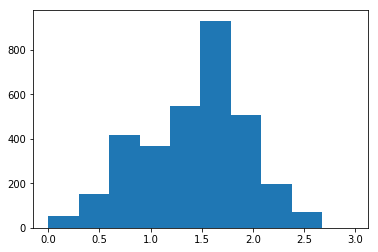

최소값 : 0.0
최대값 : 2.9746358687061645
편차 : 0.5158830146940182


In [40]:
plt.hist(aaa)
plt.show()
aaa.sort()
print('최소값 :', aaa[0])
aaa.sort(reverse=True)
print('최대값 :', aaa[0])
print('편차 :', np.std(np.array(aaa)))

In [41]:
# 값에 0 이 존재하기 때문에 모든 겂에 1을 추가, log(5)(x)이기에 0값이 발생

In [42]:
for i, k in age.items():
    age[i] = k+1

In [43]:
aaa=[]
for i,k in age.items():
    aaa.append(k)

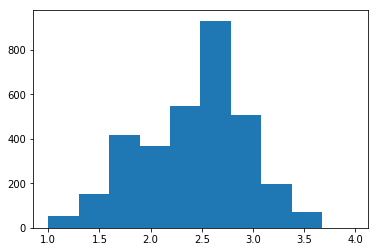

최소값 : 1.0
최대값 : 3.9746358687061645
편차 : 0.5158830146940182


In [44]:
plt.hist(aaa)
plt.show()
aaa.sort()
print('최소값 :', aaa[0])
aaa.sort(reverse=True)
print('최대값 :', aaa[0])
print('편차 :', np.std(np.array(aaa)))

In [50]:
for i,k in data.items():
    for j,m in age.items():
        if i==j:
            data[i].append(m)

In [51]:
data # 의사 넘버 , 논문데이터, 논문수, 년도수 데이터로 전환

{'2': [array([0.5553632 , 0.02204565, 0.04817488, 0.00869414, 0.06097057,
         0.11160151, 0.19315007]), 1, 1.8613531161467862],
 '3': [array([7.65488612, 0.1799335 , 0.03649125, 0.10032764, 0.50753293,
         0.0920874 , 1.42874149]), 10, 2.0],
 '4': [array([0.00952359, 0.01394262, 1.68479043, 0.00702694, 0.01928016,
         0.19569195, 0.06974444]), 2, 2.4306765580733933],
 '5': [array([0.10682068, 0.21973209, 0.12378424, 0.1975888 , 1.6770859 ,
         2.50696456, 0.16802363]), 5, 2.1132827525593783],
 '7': [array([0.02810876, 0.09685976, 0.58014823, 1.10752878, 0.95121587,
         1.14592437, 0.09021423]), 4, 2.1132827525593783],
 '8': [array([0.02777432, 0.02863081, 0.03944741, 0.02053517, 2.6503516 ,
         1.87080344, 0.36245739]), 5, 2.0],
 '9': [array([0.01099858, 0.02136085, 0.00462791, 0.03083001, 2.47507694,
         0.35302154, 0.10408421]), 3, 2.7227062322935724],
 '11': [array([0.06134545, 0.93289546, 0.49761979, 0.38685721, 1.00311359,
         0.04051954, 0.